In [8]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import h5py

def nrnMread(fileName):
    f = open(fileName, "rb")
    nparam = struct.unpack('i', f.read(4))[0]
    typeFlg = struct.unpack('i', f.read(4))[0]
    return np.fromfile(f,np.double)

# objectives_file = h5py.File('../objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
# opt_weight_list = objectives_file['opt_weight_list'][:]
# opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
# opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list]

# target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
# target_volts_hdf5 = h5py.File(target_volts_path, 'r')
# target_volts = [target_volts_hdf5[s][:] for s in opt_stim_list]
#target_volts = np.genfromtxt("targetVolts.csv", delimiter=",")
objectives_file = h5py.File('../objectives/allen485835016_objectives_passive.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
opt_stim_list = [e for e in opt_stim_name_list]

target_volts = np.genfromtxt("targetVolts_zeroed.csv", delimiter=",")

target_volts_path = './target_volts/target_volts_485835016_passive.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
target_volts_emp = [target_volts_hdf5[s][:] for s in opt_stim_list]



FileNotFoundError: [Errno 2] No such file or directory: '../Data/VHotP16.dat'

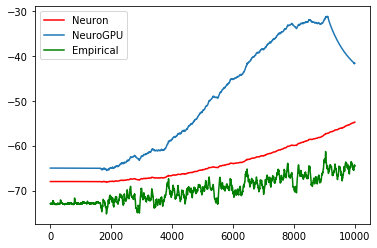

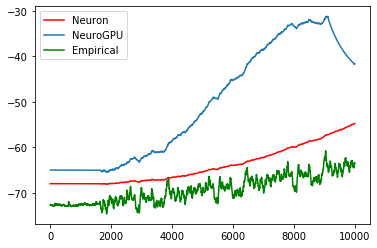

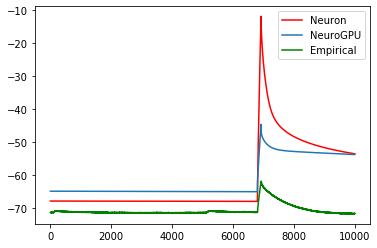

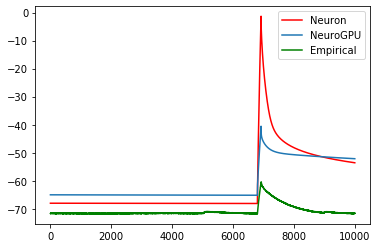

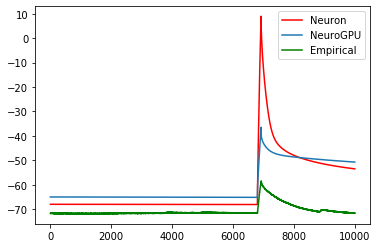

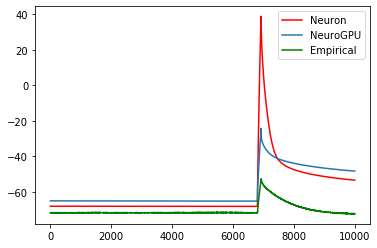

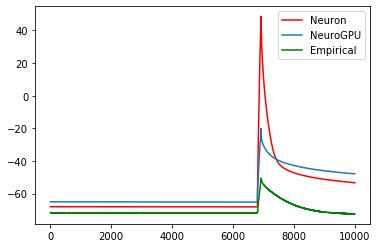

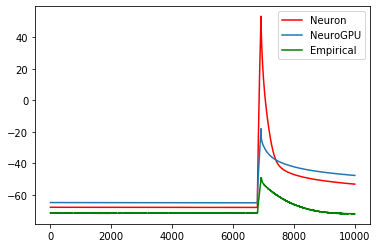

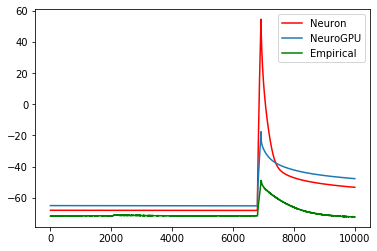

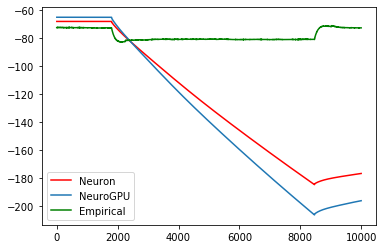

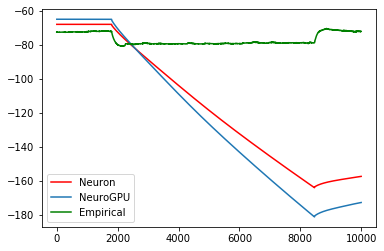

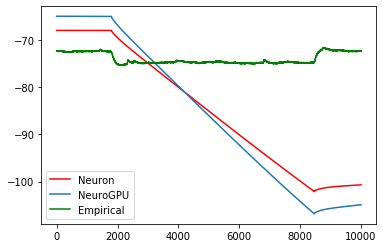

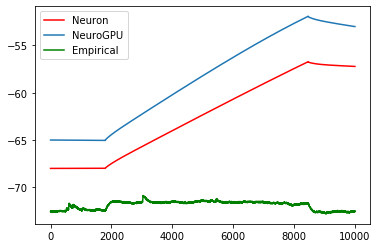

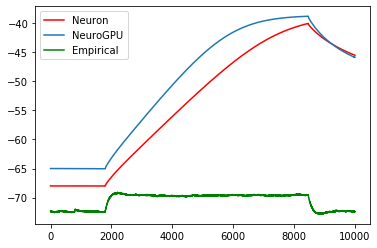

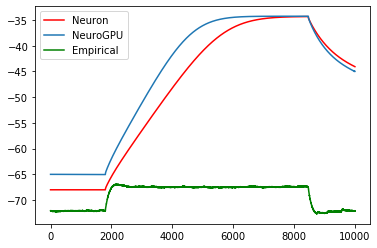

<Figure size 432x288 with 0 Axes>

In [9]:
for i in range(1,18):
    plt.figure()
    volts = nrnMread("../Data/VHotP{}.dat".format(i))[:10000]
    #target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
    #target_volts_hdf5 = h5py.File(target_volts_path, 'r')
    #target_volts = [target_volts_hdf5[s][:] for s in opt_stim_list][i]
    curr_target_volts =  target_volts[i]
    plt.plot(target_volts[i], color="Red", label="Neuron")
    myPlot = plt.plot(volts, label="NeuroGPU")
    plt.plot(target_volts_emp[i], color='green', label='Empirical')

    plt.legend()